## Python Notebook for BoomBikes

Business Objective: A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. So, company is trying to create mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.
### Model the demand for shared bikes with the available independent variables/features in given dataset.

### Steps
#### a. Data Understanding with EDA
#### b. Data Preparation
####     Encoding: Encode Categorical variables (Binary or multi value).
####     Rescale : Min-Max algorithm
#### c. Model Creation : Leverage balanced approach Auto (RFE) for feature selection and then manual (domain understanding)
#### d. Residual Analysis
#### e. Predict and evalation on test dataset

## Step 1: Data Understanding & Data Visualization

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [11]:
bikes = pd.read_csv('day.csv', header=0)
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bikes.shape

(730, 16)

In [5]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Original Data Observations
#### a. All features are non-null
####  b. Features have appropriate data types other than dteday(object column). 
####  c. Since yr and mnth are already present as seperate feature, we can extract day column from dteday. And afterwards drop dteday as it is redundant.
#### d. Since casual and registered sums upto cnt, they cann't be independent features.So, we shall drop them from dataframe.
#### e. We shall assign appropriate values to season, weathersit, mnth and weekday as current ordinal value may impact the results.

## Data Cleansing and Enrichment

In [12]:
# Create derived variable 'day' from 'dteday'
bikes['dteday']= pd.to_datetime(bikes['dteday'],format='%d-%m-%Y')
bikes['day'] = bikes['dteday'].dt.day
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5


In [13]:
# Drop redundant variables as mentioned on initial onservation
bikes = bikes.drop(columns =['instant', 'dteday', 'registered', 'casual'])
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,3
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,4
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,5


In [14]:
# Change value for feature season to relevant readable labels.

def conv_season(arg):
    switcher= {
        1: "spring",
        2: "summer",
        3: "fall",
        4: "winter",
    }
    return switcher.get(arg, "nothing")

bikes['season']=bikes['season'].apply(lambda x: conv_season(x))
bikes['season'].value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [15]:
# Change value for feature weathersit to relevant readable labels.

def conv_weathersit(arg):
    switcher= {
        1: "Clear",
        2: "Mist",
        3: "LightSnow",
        4: "HeavySnow",
    }
    return switcher.get(arg, "nothing")

bikes['weathersit']=bikes['weathersit'].apply(lambda x: conv_weathersit(x))
bikes['weathersit'].value_counts()

weathersit
Clear        463
Mist         246
LightSnow     21
Name: count, dtype: int64

In [16]:
# Change value for feature mnth to relevant readable labels and avoid ordinal value which may impact results.

def conv_mnth(arg):
    switcher= {
        1: "Jan",
        2: "Feb",
        3: "Mar",
        4: "Apr",
        5: "May",
        6: "Jun",
        7: "Jul",
        8: "Aug",
        9: "Sep",
        10: "Oct",
        11: "Nov",
        12: "Dec",
    }
    return switcher.get(arg, "nothing")

bikes['mnth']=bikes['mnth'].apply(lambda x: conv_mnth(x))
bikes['mnth'].value_counts()

mnth
Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: count, dtype: int64

In [17]:
# Change value for feature weekday to relevant readable labels and avoid ordinal value which may impact results.

def conv_weekday(arg):
    switcher= {
        0: "Tue",
        1: "Wed",
        2: "Thu",
        3: "Fri",
        4: "Sat",
        5: "Sun",
        6: "Mon",
    }
    return switcher.get(arg, "nothing")

bikes['weekday']=bikes['weekday'].apply(lambda x: conv_weekday(x))
bikes['weekday'].value_counts()

weekday
Mon    105
Tue    105
Wed    105
Thu    104
Sat    104
Sun    104
Fri    103
Name: count, dtype: int64

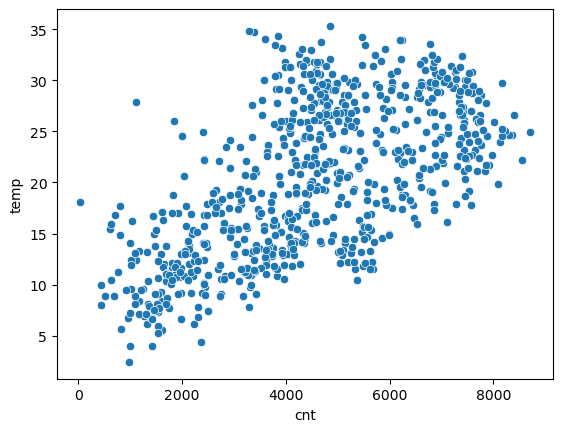

In [18]:
# Validate using Data Visualization if relationship exists b/w independent variable and dependent variable as per problem statement
# Based on this, we may decide whether we shall progress with multiLinear regression approach.
sns.scatterplot(x= 'cnt', y = 'temp', data = bikes)
plt.show()

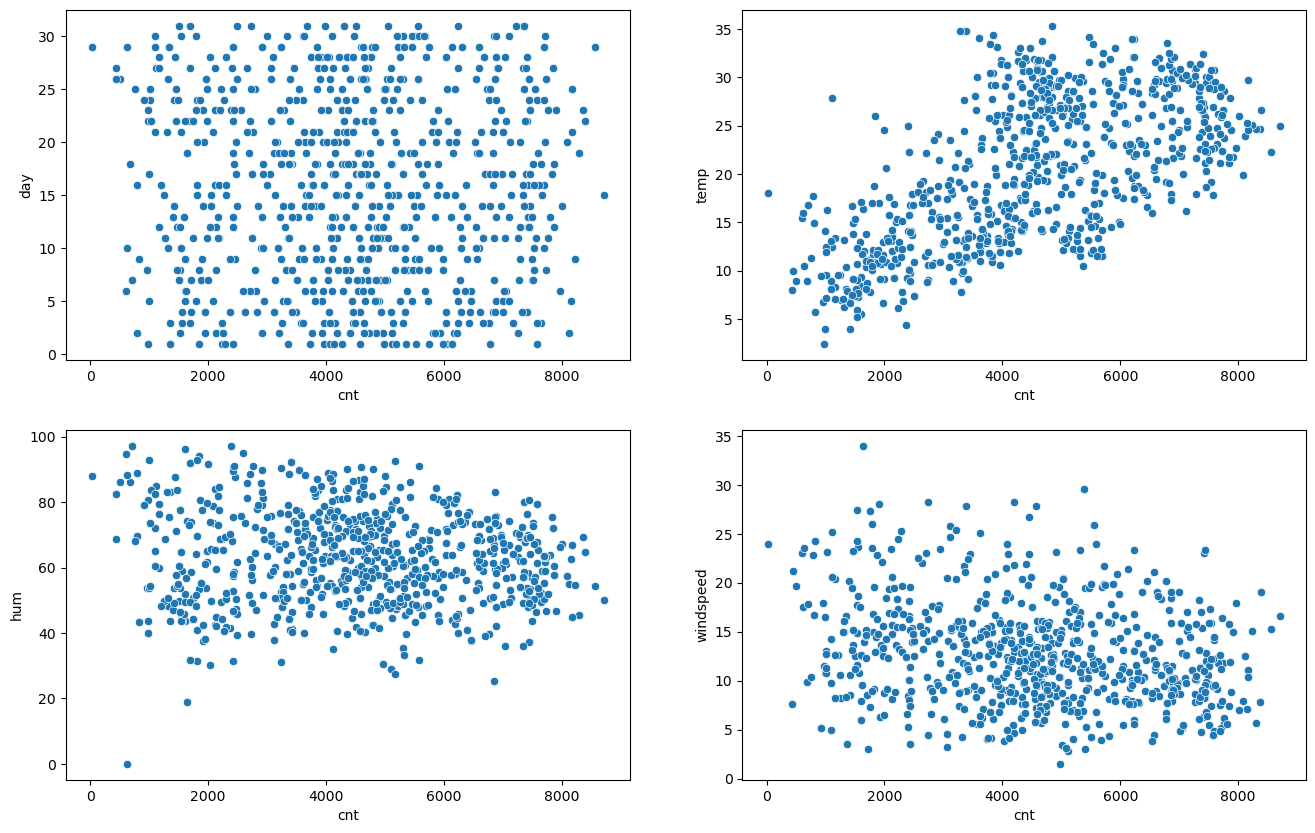

In [19]:
# Data Visualization for all important Numerical variables as per problem statement

plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.scatterplot(x= 'cnt', y = 'day', data = bikes)
# plt.subplot(2,3,2)
# sns.scatterplot(x= 'cnt', y = 'mnth', data = bikes)
# plt.subplot(2,3,3)
# sns.scatterplot(x= 'cnt', y = 'yr', data = bikes)
plt.subplot(2,2,2)
sns.scatterplot(x= 'cnt', y = 'temp', data = bikes)
plt.subplot(2,2,3)
sns.scatterplot(x= 'cnt', y = 'hum', data = bikes)
plt.subplot(2,2,4)
sns.scatterplot(x= 'cnt', y = 'windspeed', data = bikes)
plt.show()


### Interpretation of relationship with dependent variable (cnt) from above charts:
#### a. temp seems to have clear positive relalationship.
#### b. humidity and windspeed seems to have negative relatinship with bike business.
#### c. day variable doesnt seems to influence bike business. 

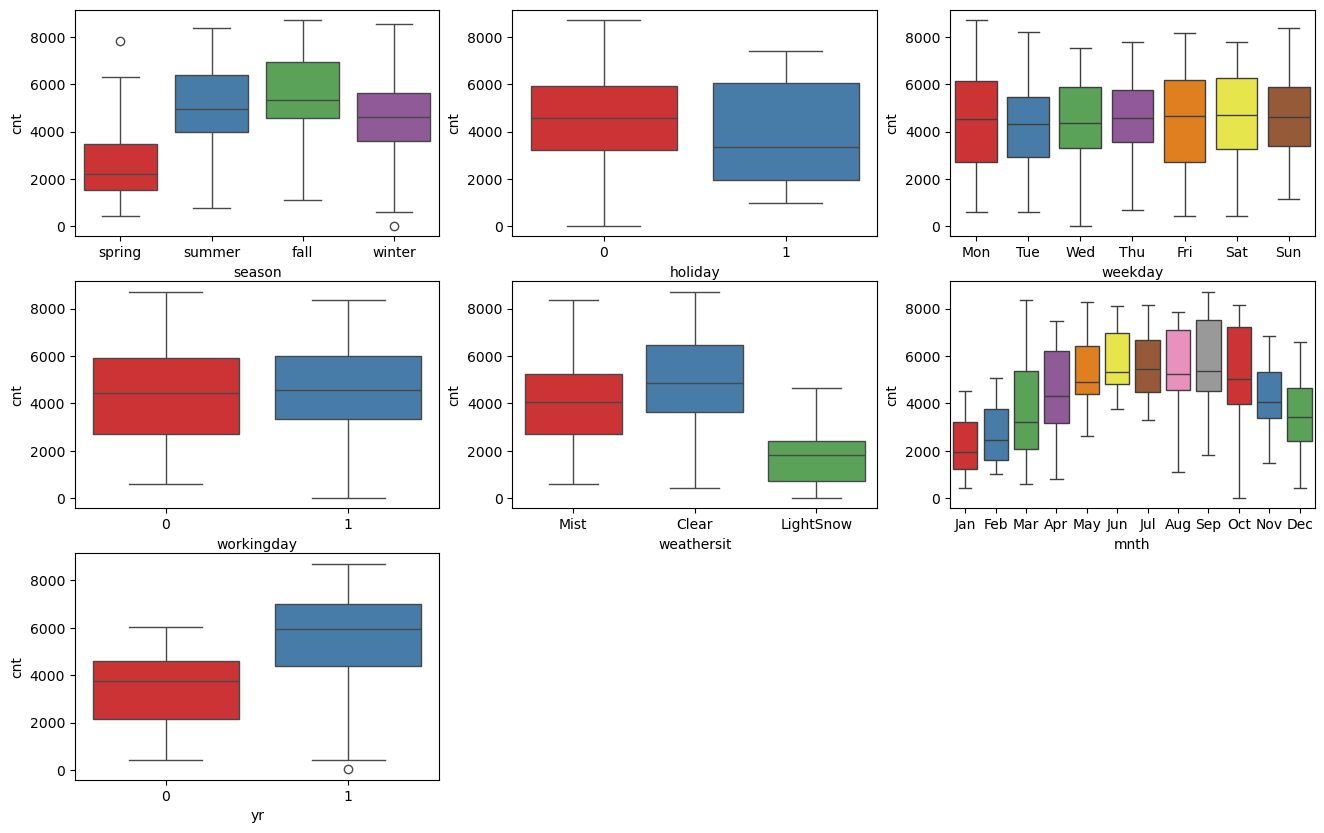

In [22]:
# Data Visualization for all important Categorical variables as per problem statement

cat_var = ['season','holiday', 'weekday', 'workingday', 'weathersit']

plt.figure(figsize = (16,10))
plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data=bikes, palette="Set1")
plt.subplot(3,3,2)
sns.boxplot(x='holiday', y='cnt', data=bikes, palette="Set1")
plt.subplot(3,3,3)
sns.boxplot(x='weekday', y='cnt', data=bikes, palette="Set1")
plt.subplot(3,3,4)
sns.boxplot(x='workingday', y='cnt', data=bikes, palette="Set1")
plt.subplot(3,3,5)
sns.boxplot(x='weathersit', y='cnt', data=bikes, palette="Set1")
plt.subplot(3,3,6)
sns.boxplot(x='mnth', y='cnt', data=bikes, palette="Set1")
plt.subplot(3,3,7)
sns.boxplot(x='yr', y='cnt', data=bikes, palette="Set1")
plt.show()


### Interpretation of relationship with dependent variable (cnt) from above charts:
#### a. 'Fall' Season have clearly most bike demand followed by 'Summer' season and then 'Winter' while Spring season has least.
#### b. On similar trend, weathersit shows clearly that bike demand is on top during 'Clear' weather followed by 'Mist' and then 'Lightsnow'.There is no data avalaible for 'HeavySnow' weather which may be due to the fact that there is almmost no demand during that time.
#### c. Working day (Holiday = 0) shows median (50th percentile) higher as compared to weekend though it is not as clear from workingday variable.
#### d. Weekday doesnt show any speicific trend.
#### e. Bike business have increased with year from 2018 to 2019.
#### f. Business seems to be better in month with supportive weather conditions (Mar - Oct) as compared to extreme weather months (Jan, Feb, Nov, Dec)

# Step 2: Data Preparation

### Dummy Variables
#### Categorical features (Season, weathersit, Mnth, Weekday) has multilevel, so we shall create dummy variables for them

In [23]:
# Season
season = pd.get_dummies(bikes['season'], drop_first=True,dtype=int)

# weathersit : We shall not drop first column here as "heavysnow' data is already not available in dataset.
weathersit=pd.get_dummies(bikes['weathersit'],dtype=int)

# mnth
mnth = pd.get_dummies(bikes['mnth'], drop_first=True,dtype=int)

# weekday
weekday = pd.get_dummies(bikes['weekday'], drop_first=True,dtype=int)


# #Concat them into original dataframe
bikes = pd.concat([bikes,season,weathersit,mnth,weekday],axis=1)

# # Drop redundant columns
bikes=bikes.drop(columns=['season','weathersit','mnth','weekday'],axis=1)

bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,day,spring,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,1,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,2,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,3,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,4,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,5,1,...,0,0,0,0,0,0,0,0,0,0


### Data Split into train and Test

In [24]:
bikes_train, bikes_test= train_test_split(bikes, train_size = 0.7, test_size =0.3, random_state=100)
print(bikes_train.head())
print(bikes_test.head())

     yr  holiday  workingday       temp    atemp      hum  windspeed   cnt  \
653   1        0           1  19.201653  23.0423  55.8333  12.208807  7534   
576   1        0           1  29.246653  33.1448  70.4167  11.083475  7216   
426   1        0           0  16.980847  20.6746  62.1250  10.792293  4066   
728   1        0           0  10.489153  11.5850  48.3333  23.500518  1796   
482   1        0           0  15.443347  18.8752  48.9583   8.708325  4220   

     day  spring  ...  May  Nov  Oct  Sep  Mon  Sat  Sun  Thu  Tue  Wed  
653   16       0  ...    0    0    1    0    0    0    0    1    0    0  
576   31       0  ...    0    0    0    0    0    0    0    1    0    0  
426    3       1  ...    0    0    0    0    1    0    0    0    0    0  
728   30       1  ...    0    0    0    0    0    0    0    0    1    0  
482   28       0  ...    0    0    0    0    1    0    0    0    0    0  

[5 rows x 32 columns]
     yr  holiday  workingday       temp     atemp      hum  wind

### Data rescaling using min max scaler

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [26]:
#Apply scaler to all Numeric variables (Except binary and dummy variables)
num_var = ['day', 'yr', 'temp', 'atemp', 'hum', 'windspeed']

bikes_train[num_var] = scaler.fit_transform(bikes_train[num_var])
bikes_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,day,spring,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
653,1.0,0,1,0.509887,0.501133,0.575354,0.300794,7534,0.500000,0,...,0,0,1,0,0,0,0,1,0,0
576,1.0,0,1,0.815169,0.766351,0.725633,0.264686,7216,1.000000,0,...,0,0,0,0,0,0,0,1,0,0
426,1.0,0,0,0.442393,0.438975,0.640189,0.255342,4066,0.066667,1,...,0,0,0,0,1,0,0,0,0,0
728,1.0,0,0,0.245101,0.200348,0.498067,0.663106,1796,0.966667,1,...,0,0,0,0,0,0,0,0,1,0
482,1.0,0,0,0.395666,0.391735,0.504508,0.188475,4220,0.900000,0,...,0,0,0,0,1,0,0,0,0,0


In [29]:
bikes_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 653 to 79
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          510 non-null    float64
 1   holiday     510 non-null    int64  
 2   workingday  510 non-null    int64  
 3   temp        510 non-null    float64
 4   atemp       510 non-null    float64
 5   hum         510 non-null    float64
 6   windspeed   510 non-null    float64
 7   cnt         510 non-null    int64  
 8   day         510 non-null    float64
 9   spring      510 non-null    int64  
 10  summer      510 non-null    int64  
 11  winter      510 non-null    int64  
 12  Clear       510 non-null    int64  
 13  LightSnow   510 non-null    int64  
 14  Mist        510 non-null    int64  
 15  Aug         510 non-null    int64  
 16  Dec         510 non-null    int64  
 17  Feb         510 non-null    int64  
 18  Jan         510 non-null    int64  
 19  Jul         510 non-null    int64

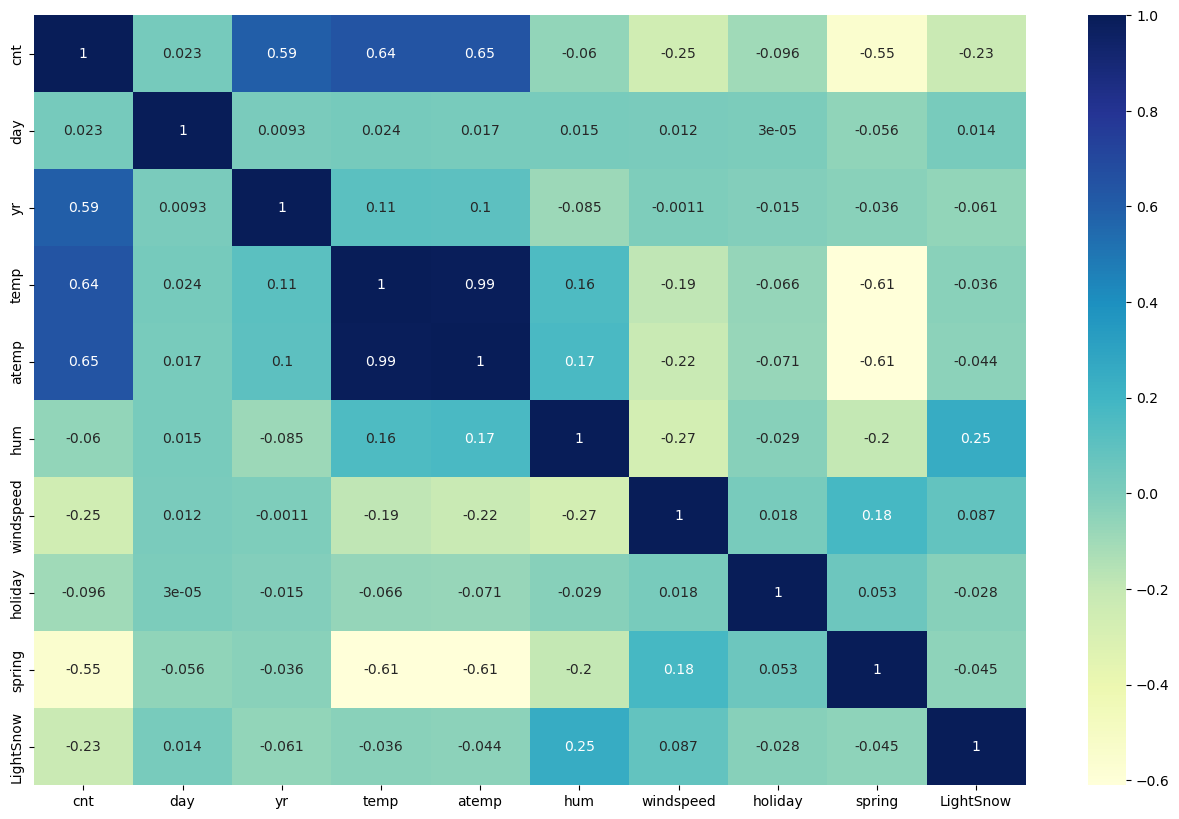

In [37]:
plt.figure(figsize = (16,10))
sns.heatmap(bikes_train[['cnt','day','yr','temp','atemp','hum','windspeed','holiday','spring','LightSnow']].corr(), annot=True,cmap='YlGnBu')
plt.show()

### Observation
### a. High Positive Correlation with dependent variable (cnt) with yr, temp, summer season, clear weather
### b. High Negative Correlation with dependent variable (cnt) with windspeed, spring, LightSnow
### c. Inter Independent variable correlation b/w temp and atemp.

In [38]:
y_train = bikes_train.pop('cnt')
X_train = bikes_train

# Step 3 : Building a Model

In [41]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#### Running RFE for Feature Selection

In [42]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [43]:
# List all features with their RFE ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('day', False, 15),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('Clear', True, 1),
 ('LightSnow', True, 1),
 ('Mist', True, 1),
 ('Aug', False, 5),
 ('Dec', False, 16),
 ('Feb', False, 17),
 ('Jan', False, 4),
 ('Jul', True, 1),
 ('Jun', False, 12),
 ('Mar', False, 13),
 ('May', False, 7),
 ('Nov', False, 14),
 ('Oct', False, 3),
 ('Sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 11),
 ('Sun', False, 10),
 ('Thu', False, 9),
 ('Tue', True, 1),
 ('Wed', False, 8)]

In [44]:
# Features selected with RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'winter', 'Clear', 'LightSnow', 'Mist', 'Jul', 'Sep', 'Mon', 'Tue'],
      dtype='object')

In [45]:
# Features discarded with RFE
X_train.columns[~rfe.support_]

Index(['atemp', 'day', 'summer', 'Aug', 'Dec', 'Feb', 'Jan', 'Jun', 'Mar',
       'May', 'Nov', 'Oct', 'Sat', 'Sun', 'Thu', 'Wed'],
      dtype='object')

## Use StatsModel to get detailed statistics

#### Iteration 1

In [47]:
import statsmodels.api as sm

In [48]:
X_train_rfe_1 = X_train[col]
X_train_rfe_1 = sm.add_constant(X_train_rfe_1)
lm = sm.OLS(y_train,X_train_rfe_1).fit()

In [49]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          3.81e-190
Time:                        10:55:02   Log-Likelihood:                -4114.3
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     496   BIC:                             8316.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1104.8340    197.384      5.597      0.0

#### Observation: 
#### holiday  and Tue shows low significance (p value > .05)

### Iteration 2 (remove holiday)

In [50]:
X_train_rfe_2 = X_train_rfe_1.drop(columns=['holiday'],axis=1)
X_train_rfe_2 = sm.add_constant(X_train_rfe_2)
lm = sm.OLS(y_train,X_train_rfe_2).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          3.81e-190
Time:                        10:59:26   Log-Likelihood:                -4114.3
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     496   BIC:                             8316.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        860.8058    284.222      3.029      0.0

#### Observation: 
#### All features shows high significance (p value < .05)
#### Prob (F-statistic) is low, R-squared =.843 , Adj. R-squared = .839 which means 83.9% variance in dependent variable is explained by model which good.

## Check Multicollinearity using VIF

In [51]:
# Calculate VIF for model
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [53]:
vif = pd.DataFrame()
X_train_rfe_2 = X_train_rfe_2.drop(columns=['const'],axis=1)
vif['features'] = X_train_rfe_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_2.values,i) for i in range(X_train_rfe_2.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,features,VIF
7,Clear,62.54
9,Mist,40.55
1,workingday,9.07
12,Mon,6.06
13,Tue,5.74
8,LightSnow,5.03
2,temp,2.99
5,spring,2.55
3,hum,1.89
6,winter,1.78


#### Observation
#### Clear, Mist, workingday, Mon, Tue and LightSnow has VIF >5, so lets drop 'Clear' first and retry the model.

#### Iteration 3 (remove Clear)

In [54]:
X_train_rfe_3 = X_train_rfe_2.drop(columns=['Clear'],axis=1)
X_train_rfe_3 = sm.add_constant(X_train_rfe_3)
lm = sm.OLS(y_train,X_train_rfe_3).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          3.81e-190
Time:                        11:09:27   Log-Likelihood:                -4114.3
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     496   BIC:                             8316.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2047.7906    345.860      5.921      0.0

In [55]:
vif = pd.DataFrame()
X_train_rfe_3 = X_train_rfe_3.drop(columns=['const'],axis=1)
vif['features'] = X_train_rfe_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_3.values,i) for i in range(X_train_rfe_3.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,features,VIF
3,hum,29.19
2,temp,17.24
1,workingday,16.92
11,Mon,4.57
4,windspeed,4.52
12,Tue,4.45
5,spring,2.79
8,Mist,2.27
6,winter,2.15
0,yr,2.08


#### Iteration 4 (remove hum)

In [57]:
X_train_rfe_4 = X_train_rfe_3.drop(columns=['hum'],axis=1)
X_train_rfe_4 = sm.add_constant(X_train_rfe_4)
lm = sm.OLS(y_train,X_train_rfe_4).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     215.3
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          4.38e-188
Time:                        11:13:26   Log-Likelihood:                -4122.0
No. Observations:                 510   AIC:                             8270.
Df Residuals:                     497   BIC:                             8325.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1357.2105    301.242      4.505      0.0

In [58]:
vif = pd.DataFrame()
X_train_rfe_4 = X_train_rfe_4.drop(columns=['const'],axis=1)
vif['features'] = X_train_rfe_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_4.values,i) for i in range(X_train_rfe_4.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,features,VIF
1,workingday,13.12
2,temp,12.38
3,windspeed,4.48
10,Mon,3.76
11,Tue,3.53
4,spring,2.44
0,yr,2.07
5,winter,1.78
7,Mist,1.57
8,Jul,1.37


#### Iteration 4 (remove workingday)

In [70]:
X_train_rfe_5 = X_train_rfe_4.drop(columns=['workingday'],axis=1)
X_train_rfe_5 = sm.add_constant(X_train_rfe_5)
lm = sm.OLS(y_train,X_train_rfe_5).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     226.7
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          7.06e-186
Time:                        11:29:10   Log-Likelihood:                -4130.1
No. Observations:                 510   AIC:                             8284.
Df Residuals:                     498   BIC:                             8335.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2234.7351    209.145     10.685      0.0

In [69]:
vif = pd.DataFrame()
X_train_rfe_5 = X_train_rfe_5.drop(columns=['const'],axis=1)
vif['features'] = X_train_rfe_5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_5.values,i) for i in range(X_train_rfe_5.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,features,VIF
1,temp,4.72
2,windspeed,4.04
0,yr,2.06
3,spring,1.66
6,Mist,1.51
4,winter,1.41
7,Jul,1.35
9,Mon,1.22
8,Sep,1.20
10,Tue,1.20


#### Observation: 
#### All features shows high significance (p value < .05)
#### Prob (F-statistic) is low, R-squared =.834 , Adj. R-squared = .830 which means 83% variance in dependent variable is explained by model which good.
#### Variance Inflation Factor(VIF) is less than 5 for all features, it means there is no collinearity exists within independent variables.

## We can accept this model

In [71]:
lm.params

const        2234.735137
yr           2040.484133
temp         3927.873482
windspeed   -1241.733628
spring       -984.845823
winter        398.438011
LightSnow   -2494.312181
Mist         -705.249175
Jul          -610.100079
Sep           456.256852
Mon           134.160342
Tue          -361.906662
dtype: float64

# Step 4 : Residual Analysis of Train Data

In [72]:
y_train_bikes = lm.predict(X_train_rfe_5)

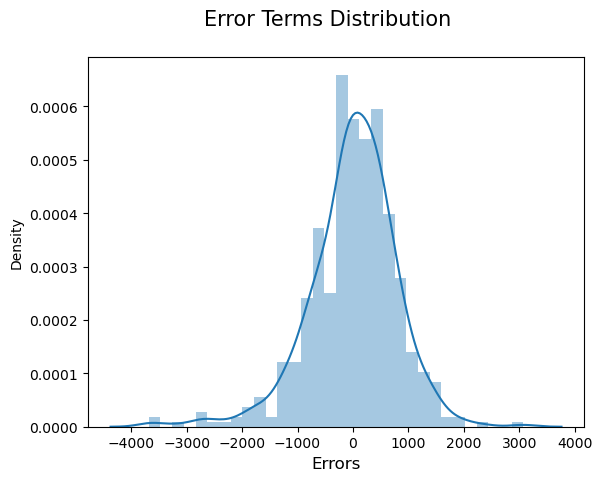

In [75]:
fig = plt.figure()
sns.distplot((y_train - y_train_bikes))
fig.suptitle('Error Terms Distribution', fontsize = 15)
plt.xlabel('Errors', fontsize = 12)
plt.show()

### Observations:  Residual error has near normal distribution with mean 0.

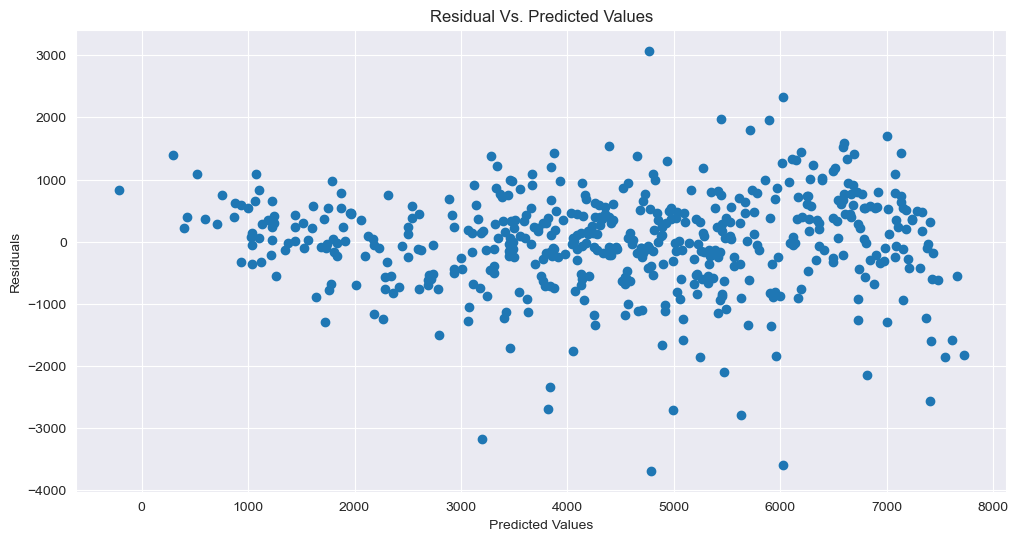

In [76]:
# Residual vs Predicted Values

plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
plt.scatter(y_train_bikes,(y_train - y_train_bikes))
plt.title('Residual Vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

#### There is no specific Pattern observed in the Error Terms with respect to Prediction, hence we can say Error terms are independent of each other.

# Step 5: Prediction and Evaluation

#### Scale the test data.

In [77]:
num_var = ['day', 'yr', 'temp', 'atemp', 'hum', 'windspeed']

bikes_test[num_var] = scaler.transform(bikes_test[num_var])
bikes_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,day,spring,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
184,0.0,1,0,0.831783,0.769660,0.657364,0.084219,6043,0.100000,0,...,0,0,0,0,0,0,0,0,0,1
535,1.0,0,1,0.901354,0.842587,0.610133,0.153728,6211,0.633333,0,...,0,0,0,0,0,0,0,0,0,0
299,0.0,0,1,0.511964,0.496145,0.837699,0.334206,2659,0.866667,0,...,0,0,1,0,0,1,0,0,0,0
221,0.0,0,1,0.881625,0.795343,0.437098,0.339570,4780,0.300000,0,...,0,0,0,0,0,0,0,0,0,0
152,0.0,0,1,0.817246,0.741471,0.314298,0.537414,4968,0.033333,0,...,0,0,0,0,0,1,0,0,0,0


#### Divide into X_test and y_test

In [78]:
y_test = bikes_test.pop('cnt')
X_test = bikes_test

In [80]:
# Make predictions.

# Creating X_test_f dataframe by dropping variables from X_test inline with our final model features
X_train_rfe_5 = X_train_rfe_5.drop(columns=['const'],axis=1)
X_test_f = X_test[X_train_rfe_5.columns]

# Adding a constant variable 
X_test_f = sm.add_constant(X_test_f)

In [81]:
# Making predictions
y_pred = lm.predict(X_test_f)

## Model Evaluation

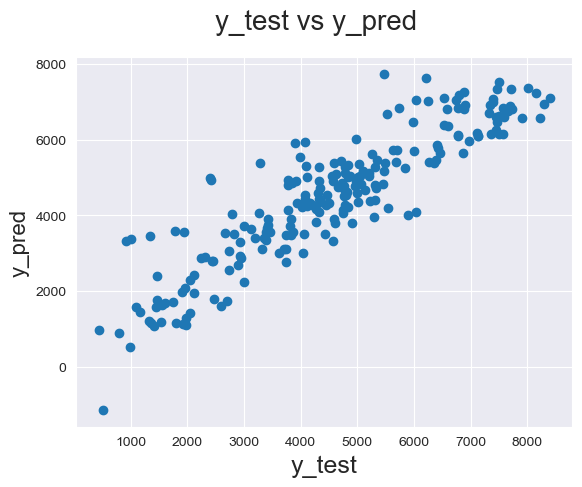

In [82]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

## Checking the r2 score

In [83]:
from sklearn.metrics import r2_score

In [84]:
# Checking the Accuracy of the Test Model
r2_score(y_test,y_pred)

0.8090249807379293

## Inline with R2 Score, model accuracy difference between the Train and Test Data is 2% which is acceptable.

In [100]:
weights = round(lm.params,2)
weights.sort_values(ascending=False, inplace=True)
weights

temp         3927.87
const        2234.74
yr           2040.48
Sep           456.26
winter        398.44
Mon           134.16
Tue          -361.91
Jul          -610.10
Mist         -705.25
spring       -984.85
windspeed   -1241.73
LightSnow   -2494.31
dtype: float64

## Insights:

#### a. Temp is the most significant feature with positive impact on Bike business.
#### b. Year shall be showing the business linearity for YoY growth.
#### c. Weather conditions / Season (Spring, Mist, Snow) has negative impact on Bike business.
#### d. Company shall identify ways to tackle weather conditions to mimimize the seasonal business impact.